# 拉勾网数据分析师岗位分析 #

## 一、项目背景 ##

   自己通过以往的工作中，发现了对于数据分析的兴趣，因此准备从事这方面的工作。在自己找工作前，需要花时间把自己学到的相关知识回顾复习一遍，同时做一些实战项目多加练习，增加熟练度。本项目在于着重复习用Python进行数据分析的相关知识，主要包括numpy, pandas和matplotlib这几个常用的库。
   
## 二、项目简介 ##

   既然希望从事数据分析师这个岗位，那首先需要对这个岗位有所了解。从企业那里我们能够获得最直接、最真实的需求信息，而通过对企业的需求信息的分  析才最能够指导自己的学习方向和简历准备。
   
   本次项目即是利用爬虫爬取拉勾网上数据分析这一岗位的信息，然后进行一些分析和探索，通过数据分析来了解“数据分析”。
   
## 三、数据来源 ##

   本项目所使用的数据全部来自拉勾网，是通过集搜客这一网络爬虫工具进行爬取的。集搜客是一款简洁易用且功能强大的网络爬虫工具，通过鼠标点选和简单的命令操作即可实现爬虫的定制和运行。
   
   之所以选择拉勾网作为本项目的数据源，主要是因为相对于其他招聘网站，拉钩网的岗位信息非常完整、整洁，极少存在信息的缺漏，并且几乎所有展现出来的信息都是非常规范化的，极大的减少了前期数据清理和数据整理的工作量。
   
   本次用爬虫爬取数据，获取了以下主要信息：

| 内容    | 字段    |
|----------|-----------|
|岗位名称  |title      |
|月薪     |month_salary|
|公司名称  |company     |
|所属行业  |industry    |
|融资阶段  |phase       |
|所在城市  |city        |
|经验要求  |experience  |
|学历要求  |qualification|
|全职/兼职 |full_or_parttime|
|职位描述及任职要求|description|

## 四、项目意义 ##

   主要是希望通过实际的数据来解答自己对数据分析岗位的一些疑惑。具体来说，是以下几个问题：
   
    1、整个群体中薪酬分布的情况；
    2、数据分析岗位需求的地域性分布；
    3、不同城市的数据分析岗位的薪酬情况是怎样的；
    4、数据分析岗位对于工作经验的要求是怎样的；
    5、根据工作经验的不同，薪酬是如何变化的；
    6、从用人单位的角度来看，数据分析岗位的从业者应当具备哪些技能；
    7、掌握不同技能是否会对薪酬产生影响，有影响会是怎样的影响；
   
## 五、项目使用的技术和工具 ##   

   本项目主要分为两部分，第一部分是数据爬取，采用集搜客网络爬虫工具；第二部分是数据分析，以Python编程语言为基础。
   
   数据分析部分主要使用pandas作为数据整理和统计分析的工具，使用matplotlib实现数据的可视化以及图形的美化。在进行技能需求分析时，使用jieba和re作为分词工具包，并使用wordcloud包制作词云。
   

## 六、数据加载和清理 ##

In [1]:
# 导入需要使用的库包和工具

# -*- coding:utf-8 -*-
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import jieba
import jieba.analyse
import re
from wordcloud import WordCloud
# from matplotlib.font_manager import FontProperties
%matplotlib notebook

In [2]:
# matplotlib库默认字体不是中文字体，在显示中文时出现乱码，所以可以显式的指定字体，或者进行参数的设置

# 显式的指定字体
# font_big = FontProperties(fname='D:/Anaconda3/Lib/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf', size=24)
# font_small = FontProperties(fname='D:/Anaconda3/Lib/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf', size=16)    
    
# 参数设置
plt.rcParams['font.sans-serif'] = ['SimHei']    # 设置字体为'SimHei'(黑体)字体
plt.rcParams['axes.unicode_minus'] = False      # 解决负号(-)不能正常显示的问题

In [3]:
data = pd.read_excel('data_from_Lagou.xlsx')

In [4]:
data.head(5)

,title,month_salary,company,industry,phase,city,experience,qualification,full_or_part,description,...,_realpath,_theme,_middle,_createdate,_pageno,_actionno,_actionvalue,_prestamp,_currentstamp,_importtime
0,数据分析师,20k-35k,车托帮,移动互联网 生活服务,C轮,北京,经验1-3年,本科及以上,全职,职位描述： 岗位职责：1、根据集团战略规划，拆分战略指标（财务/业务）与其他部门达成KPI的...,...,https://www.lagou.com/jobs/5950873.html,拉勾数据分析列表采集第二级,规则_1,2019-5-30 19:26:42,0,NaN,NaN,DSEngine-+--+-0,DSEngine-+-ds_browser_top-+-1559215602618,1559229621
1,数据分析师,18k-30k,阿卡索外教网,"教育,移动互联网",C轮,深圳,经验3-5年,本科及以上,全职,职位描述： 目前数据分析分为两个方向：1.业务方向2.战略方向岗位职责（业务方向）：1. 与...,...,https://www.lagou.com/jobs/5229237.html,拉勾数据分析列表采集第二级,规则_1,2019-5-30 19:26:53,0,NaN,NaN,DSEngine-+--+-0,DSEngine-+-ds_browser_top-+-1559215613533,1559229621
2,数据分析师,8k-15k,作文纸条,"移动互联网,教育",A轮,广州,经验1-3年,本科及以上,全职,职位描述： 岗位职责：1、对接日常数据需求并评估需求合理性，主导规划并建立业务核心数据指标体...,...,https://www.lagou.com/jobs/5976612.html,拉勾数据分析列表采集第二级,规则_1,2019-5-30 19:27:4,0,NaN,NaN,DSEngine-+--+-0,DSEngine-+-ds_browser_top-+-1559215624207,1559229621
3,数据分析师,15k-30k,字节跳动,"移动互联网,数据服务",C轮,北京,经验1-3年,本科及以上,全职,职位描述： 职位职责：1、参与核心数据模型设计，定期监控指标稳定性，分析数据异常波动原因；2...,...,https://www.lagou.com/jobs/4108164.html,拉勾数据分析列表采集第二级,规则_1,2019-5-30 19:27:14,0,NaN,NaN,DSEngine-+--+-0,DSEngine-+-ds_browser_top-+-1559215634523,1559229621
4,BI数据分析师,15k-25k,e城e家,"移动互联网,O2O",不需要融资,北京,经验3-5年,本科及以上,全职,职位描述： 工作职责：1、负责对公司各平台的数据进行整理、挖掘及分析工作；2、负责将公司各部...,...,https://www.lagou.com/jobs/5960628.html,拉勾数据分析列表采集第二级,规则_1,2019-5-30 19:27:25,0,NaN,NaN,DSEngine-+--+-0,DSEngine-+-ds_browser_top-+-1559215645165,1559229621


In [5]:
# 清理不需要的字段
new_data = data.drop(['_clueid','_fullpath','_realpath',
                      '_theme','_middle','_pageno',
                      '_actionno','_actionvalue','_prestamp',
                      '_currentstamp','_importtime'],
                     axis=1)

In [6]:
new_data.head(5)

,title,month_salary,company,industry,phase,city,experience,qualification,full_or_part,description,_createdate
0,数据分析师,20k-35k,车托帮,移动互联网 生活服务,C轮,北京,经验1-3年,本科及以上,全职,职位描述： 岗位职责：1、根据集团战略规划，拆分战略指标（财务/业务）与其他部门达成KPI的...,2019-5-30 19:26:42
1,数据分析师,18k-30k,阿卡索外教网,"教育,移动互联网",C轮,深圳,经验3-5年,本科及以上,全职,职位描述： 目前数据分析分为两个方向：1.业务方向2.战略方向岗位职责（业务方向）：1. 与...,2019-5-30 19:26:53
2,数据分析师,8k-15k,作文纸条,"移动互联网,教育",A轮,广州,经验1-3年,本科及以上,全职,职位描述： 岗位职责：1、对接日常数据需求并评估需求合理性，主导规划并建立业务核心数据指标体...,2019-5-30 19:27:4
3,数据分析师,15k-30k,字节跳动,"移动互联网,数据服务",C轮,北京,经验1-3年,本科及以上,全职,职位描述： 职位职责：1、参与核心数据模型设计，定期监控指标稳定性，分析数据异常波动原因；2...,2019-5-30 19:27:14
4,BI数据分析师,15k-25k,e城e家,"移动互联网,O2O",不需要融资,北京,经验3-5年,本科及以上,全职,职位描述： 工作职责：1、负责对公司各平台的数据进行整理、挖掘及分析工作；2、负责将公司各部...,2019-5-30 19:27:25


In [7]:
# 对删减后的数据进行查重，对于'公司名称','岗位名称','职位描述及任职要求'这三列都相同的数据，则认为这些数据是重复的
duplicated_data = new_data.duplicated(['company','title','description'])

In [8]:
# 确认被查重的数据存在重复记录
duplicated_data.unique()

array([False,  True])

In [9]:
# 转化为虚拟变量，统计重复记录的个数
dummies = pd.get_dummies(duplicated_data)
sum = 0
for x in dummies[True]:
    sum = sum + x
print(sum)

174


In [10]:
dummies.head()

,False,True
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [11]:
# 清除重复记录
clean_data = new_data.drop_duplicates(['company','title','description'])

In [12]:
clean_data.index = pd.Series(np.arange(len(clean_data)))

In [13]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 715 entries, 0 to 714
Data columns (total 11 columns):
title            715 non-null object
month_salary     715 non-null object
company          715 non-null object
industry         715 non-null object
phase            715 non-null object
city             715 non-null object
experience       715 non-null object
qualification    715 non-null object
full_or_part     715 non-null object
description      715 non-null object
_createdate      715 non-null object
dtypes: object(11)
memory usage: 67.0+ KB


通过读取初步清理后的数据信息，我们可以看到，数据集的字段为11列，数据记录是715条（重复记录174条）。整个数据集各个字段的数据完整度非常好，都不存在缺失值，这非常利于后续的分析。

## 七、数据分析 ##

### 7.1 整体薪酬分布情况 ###

In [14]:
# 查看薪酬分布
# 由于拉勾网的薪酬基本都是区间范围，且多有重叠部分，不便于直接进行量化分析
# 因此将对薪酬的数据进行清理，取区间的均值作为薪酬值

# 自定义一个函数，向其传入一个薪酬区间字符串，结果返回区间均值
def avg_month_salary(month_salary):
    try:
        salary_list = month_salary.split('-')
        salary_min = int(salary_list[0][:-1])
        salary_max = int(salary_list[1][:-1])
        salary_avg = float(salary_min + salary_max) / 2
    except ValueError:
        salary_list = month_salary.split('k')
        salary_avg = int(salary_list[0])
    except IndexError:
        salary_list = month_salary.split('k')
        salary_avg = int(salary_list[0])
    return salary_avg

# 对清理后的数据应用定义好的avg_month_salary()函数，并在数据集中添加新的字段
clean_data['avg_month_salary'] = clean_data['month_salary'].apply(avg_month_salary)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [15]:
clean_data.head()

,title,month_salary,company,industry,phase,city,experience,qualification,full_or_part,description,_createdate,avg_month_salary
0,数据分析师,20k-35k,车托帮,移动互联网 生活服务,C轮,北京,经验1-3年,本科及以上,全职,职位描述： 岗位职责：1、根据集团战略规划，拆分战略指标（财务/业务）与其他部门达成KPI的...,2019-5-30 19:26:42,27.5
1,数据分析师,18k-30k,阿卡索外教网,"教育,移动互联网",C轮,深圳,经验3-5年,本科及以上,全职,职位描述： 目前数据分析分为两个方向：1.业务方向2.战略方向岗位职责（业务方向）：1. 与...,2019-5-30 19:26:53,24.0
2,数据分析师,8k-15k,作文纸条,"移动互联网,教育",A轮,广州,经验1-3年,本科及以上,全职,职位描述： 岗位职责：1、对接日常数据需求并评估需求合理性，主导规划并建立业务核心数据指标体...,2019-5-30 19:27:4,11.5
3,数据分析师,15k-30k,字节跳动,"移动互联网,数据服务",C轮,北京,经验1-3年,本科及以上,全职,职位描述： 职位职责：1、参与核心数据模型设计，定期监控指标稳定性，分析数据异常波动原因；2...,2019-5-30 19:27:14,22.5
4,BI数据分析师,15k-25k,e城e家,"移动互联网,O2O",不需要融资,北京,经验3-5年,本科及以上,全职,职位描述： 工作职责：1、负责对公司各平台的数据进行整理、挖掘及分析工作；2、负责将公司各部...,2019-5-30 19:27:25,20.0


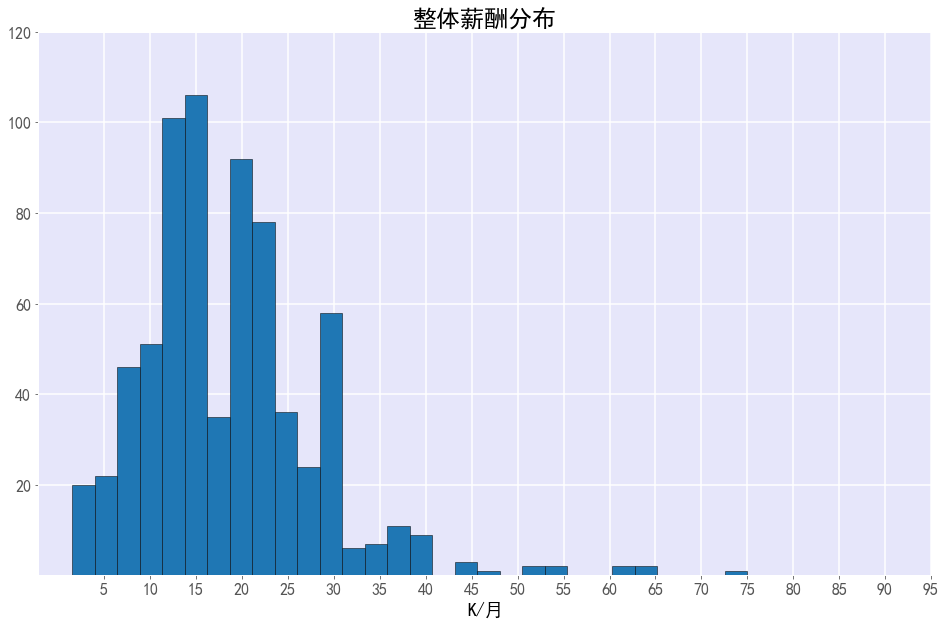

In [16]:
# 绘制整体薪酬分布情况的直方图
plt.style.use('ggplot')
fig = plt.figure(figsize = (16, 10))
ax1 = fig.add_subplot(1, 1, 1)
rect = ax1.hist(clean_data['avg_month_salary'], 
                bins=30, 
                color='tab:blue', 
                edgecolor='k')
ax1.set_title('整体薪酬分布',fontsize=24, color='k')
ax1.set_xlabel('K/月',fontsize=18, color='k')
ax1.grid(True, color='w', linewidth=1.5)
plt.xticks(range(5, 100, 5), fontsize=16)
plt.yticks(range(20, 130, 20),fontsize=16)
plt.gca().patch.set_facecolor('lavender') # 设置坐标系(axes)背景颜色

# ax1.spines['top'].set_visible(False) #去掉上边框
# ax1.spines['bottom'].set_visible(False) #去掉下边框
# ax1.spines['left'].set_visible(False) #去掉左边框
# ax1.spines['right'].set_visible(False) #去掉右边框

如大多数其他的工作一样,数据分析师的薪酬也是一个右偏分布。大多数人的收入集中在每月5k-30k，少数人能够获得更高的薪酬，极少数人获得极高的薪酬，让人向往。

需要说明的是，**拉勾网上的薪酬值是一个区间值，并且相互之间互有重叠，为了便于分析，取区间的中值作为代表值进行的分析。**因此，实际的薪酬分布情况可能会比图中的情况更好一些。因为，总是有人能够拿到区间薪酬的上限。
    
综合来看，数据分析师的**薪酬收入整体还是可观的**，从薪酬这方面说，选择这个职业还是很不错的。

### 7.2 地域性分布情况 ###

In [17]:
# 观察地域分布情况,即各个城市数据分析岗位的需求数量
count_by_city = clean_data.groupby('city')['title'].count().sort_values(ascending=False)

In [18]:
count_by_city

city
北京    236
上海    175
深圳    100
广州     57
杭州     54
武汉     22
成都     17
南京      8
佛山      6
西安      6
长沙      5
苏州      4
厦门      4
福州      3
郑州      3
重庆      3
天津      3
宁波      2
合肥      1
韶关      1
周口      1
惠州      1
梅州      1
济南      1
揭阳      1
Name: title, dtype: int64

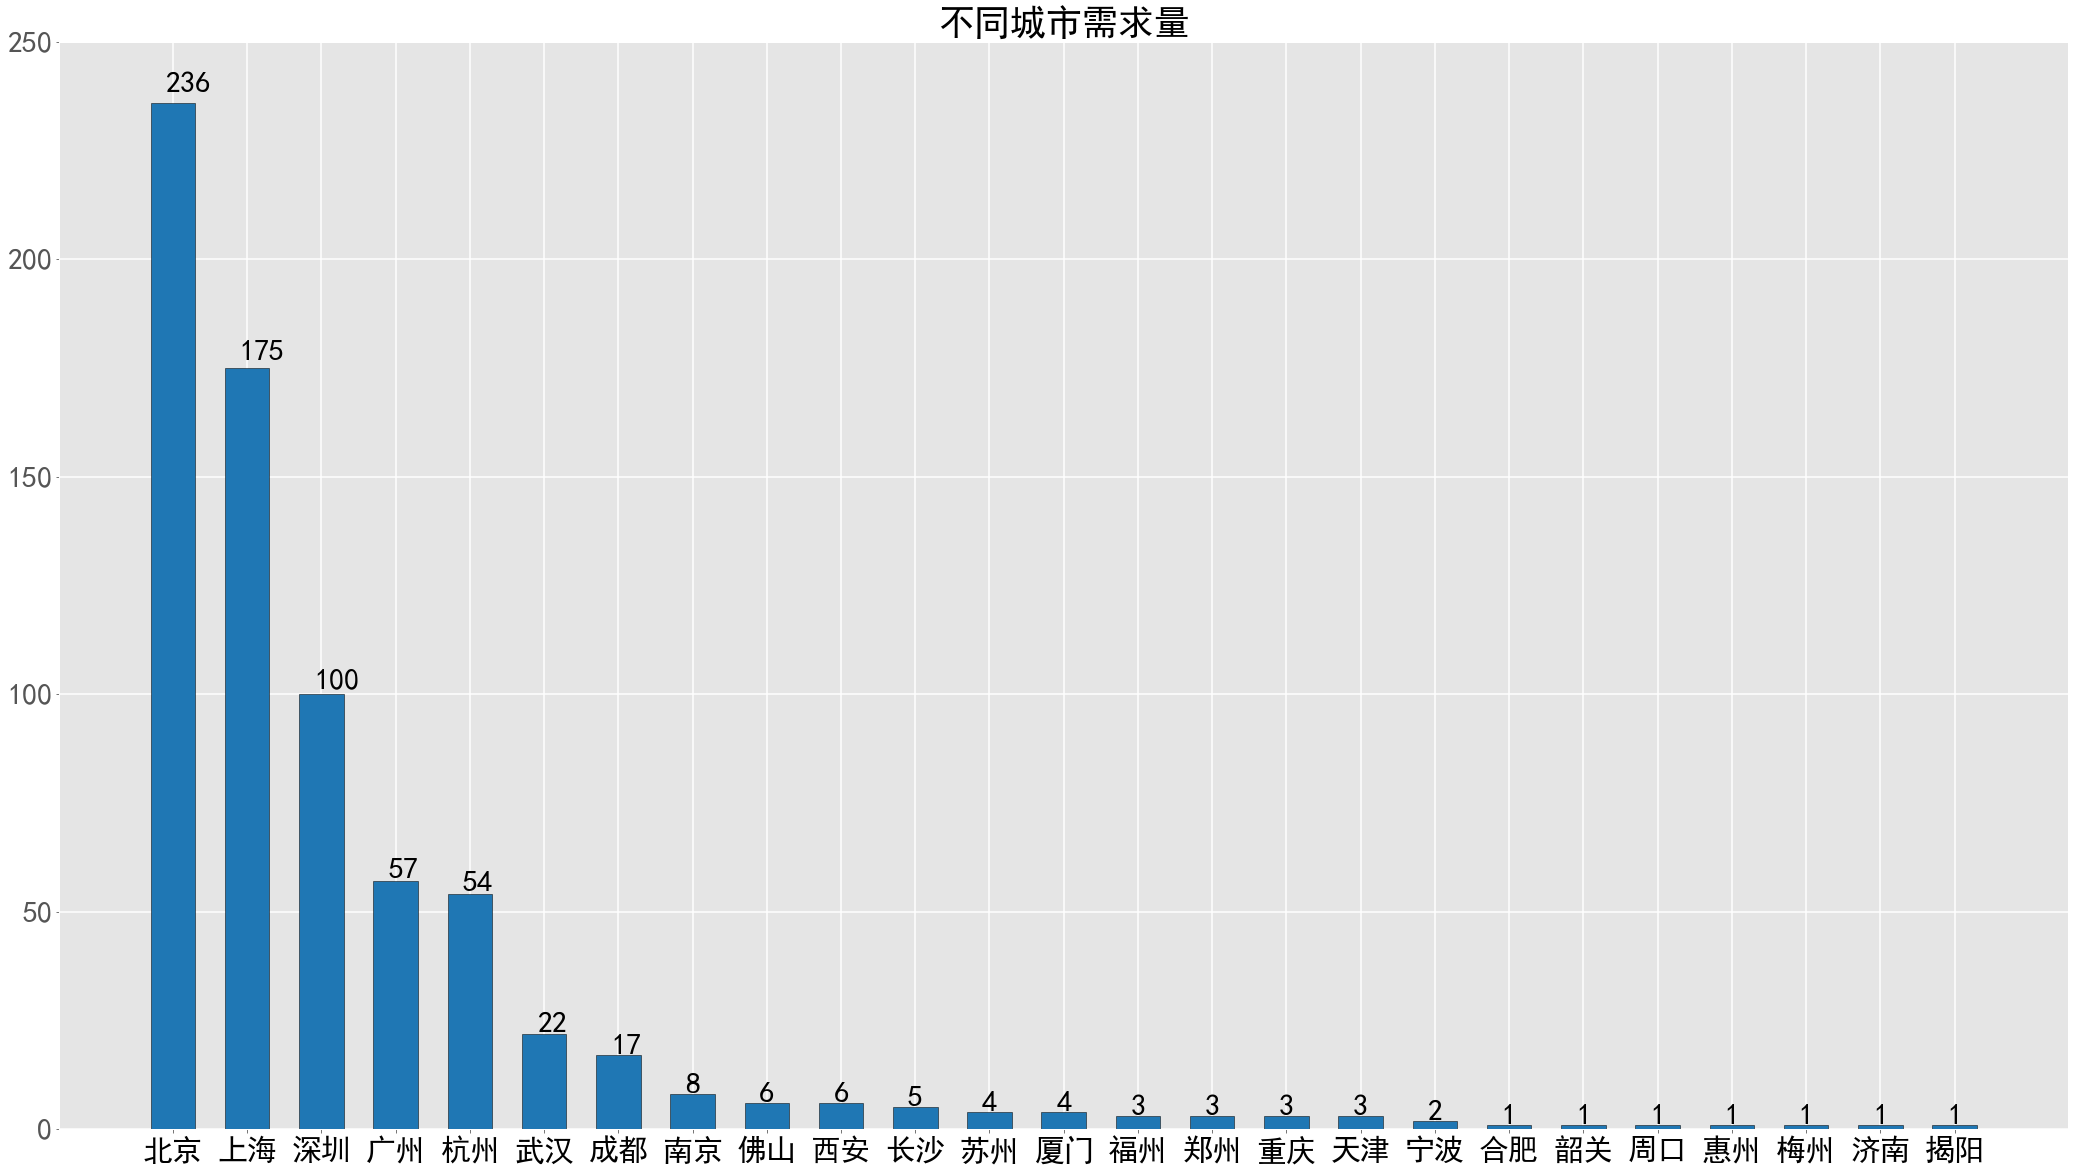

In [19]:
# 绘制地域性分布的条形图
fig = plt.figure(figsize = (36, 20))
ax2 = fig.add_subplot(1, 1, 1)
rect = ax2.bar(np.arange(len(count_by_city)), 
               count_by_city.values, 
               width=0.6, 
               color='tab:blue', 
               edgecolor='k')
ax2.set_title('不同城市需求量',fontsize=36)
ax2.grid(True, color='w', linewidth=1.5)

# 现在地域需求分布的柱状图大体已经设置好，但还不清楚各个城市所对应的需求量
# 接下来添加X轴的刻度标签和各自对应的数据标签

# 设置X轴的刻度标签
plt.xticks(range(0, len(count_by_city), 1))
ax2.set_xticklabels(count_by_city.index, color='k',fontsize=30)

# 自定义函数匹配X轴的刻度标签
# def auto_xticks(rects, xticks):
    # x = []
    # for rect in rects:
        # x.append(rect.get_x() + rect.get_width()/2)
        # plt.xticks(x, xticks, color='k')
# auto_xticks(rect, count_by_city.index)
# ax2.set_xticklabels(count_by_city.index, fontsize=24)

# 设置y轴的刻度
plt.yticks(range(0, 270, 50), fontsize=30)

# 设置每个刻度标签对应的数据标签
def auto_tags(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/3, 1.01*height, '%s' % int(height), fontsize=30)
auto_tags(rect)

在拉勾网上，全国有25个城市的企业有数据分析师的人才需求，其中三分之一的需求产生在北京，需求量全国第一。排在前5的分别是：北京、上海、深圳、广州、杭州。

数据分析这一职业大量集中在北上广深四大一线城市，以及杭州这个互联网和电子商务企业的聚集地。北京对于数据分析岗位巨大的需求是比较符合实际情况，首先我国大量互联网企业在北京聚集，其次互联网企业相较于其他企业更注重于数据的分析和运用，并且拉勾网是一个偏重互联网相关行业的招聘平台，有这个结果也算合理。

总而言之，可以得出一个清晰的结论：**数据分析这一岗位，有大量的工作机会集中在北上广深以及杭州**，期待往这个方向发展的同学还是要到这些城市去多多尝试。当然，从另一个方面说，这些城市也集中了大量的各行业人才，竞争压力也是很大的。

### 7.3 不同城市间的薪酬分布情况 ###

([<matplotlib.axis.YTick at 0xecabb70>,
 <a list of 16 Text yticklabel objects>)

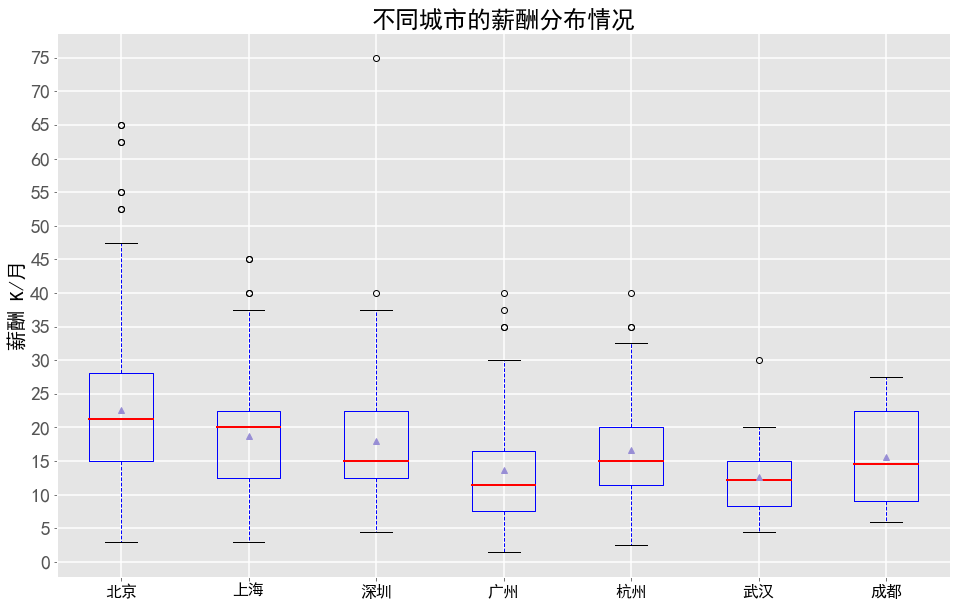

In [20]:
# 很多城市的数据样本太小,其箱线图并无多少实际意义，因此我们着重关注岗位需求数量前七位的城市

# 对平均薪酬按城市进行分组
group_by_city_salary = clean_data.groupby(['city'])['avg_month_salary']

# 取岗位需求量前七的城市的数据
large_data_city = pd.DataFrame(count_by_city[:7]).drop(columns='title')
city_salary_list = []
for city in large_data_city.index:
    v = group_by_city_salary.get_group(city).values
    city_salary_list.append(v)

# 绘制薪酬分布箱线图,并进行设置    
fig = plt.figure(figsize=(16, 10))
ax3 = fig.add_subplot(1, 1, 1)
box = ax3.boxplot(city_salary_list, 
                  showmeans=True,
                  boxprops={'color':'b'},
                  medianprops={'color':'red', 'linewidth':2},
                  whiskerprops={'linestyle':'dashed', 'color':'b'})
ax3.set_title('不同城市的薪酬分布情况', fontsize=24)
ax3.set_ylabel('薪酬 K/月', fontsize=20, color='k')
ax3.set_xticklabels(large_data_city.index, color='k', fontsize=16)
ax3.grid(True, color='w', linewidth=1.5)
plt.yticks(range(0, 80, 5), fontsize=20)

忽略掉那些人才需求量比较小的城市，重点关注排名前七的城市。从图上看，这七大城市的薪酬分布情况总体来说都比较集中，数据分析岗的大部分薪酬都处于每月5k-30k的水平，这和我们前面看到的全国的薪酬总体情况分布是基本一致的。

北京数据分析岗位的薪酬分布中位数大约在21k,居全国首位。其次是上海(约20k),之后是深圳（约15k）和杭州(约15k)。同时，因为异常值(较高的薪酬)的存在，使得大部分城市的均值都高于中位数。

**单从待遇上看，数据分析师留在北京和上海发展会是个不错的选择。**当然，如果个人特别优秀，那么北京将会是更好的选择，你在这里会有更大的可能获得更高的薪资待遇。

### 7.4 工作经验的需求情况 ###

In [21]:
# 观察工作经验这一列的分布

# 处理工作经验这一列,清除'经验'这两个字
def remove_two_words(word):
    return word.lstrip('经验')

clean_data['experience'] = clean_data['experience'].apply(remove_two_words)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [22]:
clean_data.head()

,title,month_salary,company,industry,phase,city,experience,qualification,full_or_part,description,_createdate,avg_month_salary
0,数据分析师,20k-35k,车托帮,移动互联网 生活服务,C轮,北京,1-3年,本科及以上,全职,职位描述： 岗位职责：1、根据集团战略规划，拆分战略指标（财务/业务）与其他部门达成KPI的...,2019-5-30 19:26:42,27.5
1,数据分析师,18k-30k,阿卡索外教网,"教育,移动互联网",C轮,深圳,3-5年,本科及以上,全职,职位描述： 目前数据分析分为两个方向：1.业务方向2.战略方向岗位职责（业务方向）：1. 与...,2019-5-30 19:26:53,24.0
2,数据分析师,8k-15k,作文纸条,"移动互联网,教育",A轮,广州,1-3年,本科及以上,全职,职位描述： 岗位职责：1、对接日常数据需求并评估需求合理性，主导规划并建立业务核心数据指标体...,2019-5-30 19:27:4,11.5
3,数据分析师,15k-30k,字节跳动,"移动互联网,数据服务",C轮,北京,1-3年,本科及以上,全职,职位描述： 职位职责：1、参与核心数据模型设计，定期监控指标稳定性，分析数据异常波动原因；2...,2019-5-30 19:27:14,22.5
4,BI数据分析师,15k-25k,e城e家,"移动互联网,O2O",不需要融资,北京,3-5年,本科及以上,全职,职位描述： 工作职责：1、负责对公司各平台的数据进行整理、挖掘及分析工作；2、负责将公司各部...,2019-5-30 19:27:25,20.0


In [23]:
# 结合实际情况来看,'经验不限'和'应届毕业生'这两个表述,基本等同工作经验在1年以下
# 对使用这种表述的经验需求全部合并
for i in range(len(clean_data['experience'])):
    if clean_data['experience'].iloc[i] in ['不限','应届毕业生']:
        clean_data['experience'].iloc[i] = '1年以下'

D:\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [24]:
# 对整理后的数据，按经验分组并进行计数聚合
count_by_exp = clean_data.groupby('experience')['title'].count()

In [25]:
count_by_exp

experience
1-3年     232
10年以上      3
1年以下     106
3-5年     297
5-10年     77
Name: title, dtype: int64

In [26]:
# 对数据分组聚合后,经验这一列由值(values)变为了索引(index)
# 将数据转化为DataFrame的形式，再按经验进行排序
sort_by_exp = pd.DataFrame(count_by_exp.values, index=count_by_exp.index, columns=['count'])

In [27]:
# 按照经验需求进行排序 
mappings = {'1年以下':0, '1-3年':1, '3-5年':2, '5-10年':3, '10年以上':4}
sort_by_exp['sorted'] = sort_by_exp.index.map(mappings)
sort_by_exp.sort_values(by='sorted', inplace=True)

In [28]:
sort_by_exp

,count,sorted
experience,,
1年以下,106,0
1-3年,232,1
3-5年,297,2
5-10年,77,3
10年以上,3,4


([<matplotlib.axis.YTick at 0xede0160>,
 <a list of 7 Text yticklabel objects>)

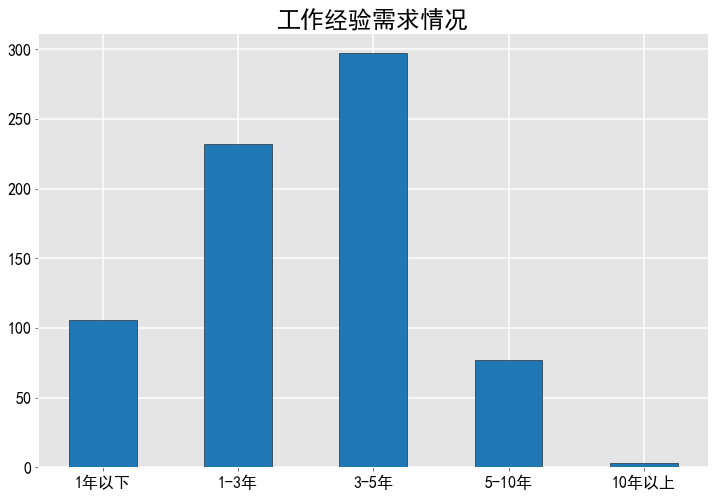

In [29]:
# 绘制经验需求情况的条形图
fig = plt.figure(figsize = (12, 8))
ax4 = fig.add_subplot(1, 1, 1)
rect = ax4.bar(np.arange(len(sort_by_exp)), 
               sort_by_exp['count'], 
               width=0.5, 
               color='tab:blue', 
               edgecolor='k')
ax4.set_title('工作经验需求情况',fontsize=24)
plt.xticks(range(0, len(sort_by_exp), 1))
# auto_xticks(rect,sort_by_exp.index)   也可调用auto_xticks()函数生成X轴的刻度
ax4.set_xticklabels(sort_by_exp.index, color='k', fontsize=16)
ax4.grid(True, color='w', linewidth=1.5)
plt.yticks(range(0, 310, 50), color='k', fontsize=16)

由图可以看出，工作经验的需求情况接近正态分布。有3-5年工作经验的数据分析师需求量最大，其次是1-3年工作经验的分析师。工作经验不足1年的新人和工作经验5-10年的老师傅，市场需求量相对较少。另外，需要工作经验10年以上的则是凤毛麟角了。

从这个分布我们大致可以推测出：
1. **数据分析是个年轻化的职业，大量的需求集中在1-5年的工作经验；**
2. **对于数据分析师来说，5年是个瓶颈期，如果在5年之内没有转型或者质的提升，以后的竞争压力会比较大。**

### 7.5 不同工作经验的薪酬情况 ###

In [30]:
# 观察不同经验要求的薪酬

# 对平均薪酬按工作经验分组
group_by_exp_salary = clean_data.groupby('experience')['avg_month_salary']

sorted_exp_list=[]
for exp in sort_by_exp.index:
    v = group_by_exp_salary.get_group(exp).values
    sorted_exp_list.append(v) 

([<matplotlib.axis.YTick at 0xee3db00>,
 <a list of 9 Text yticklabel objects>)

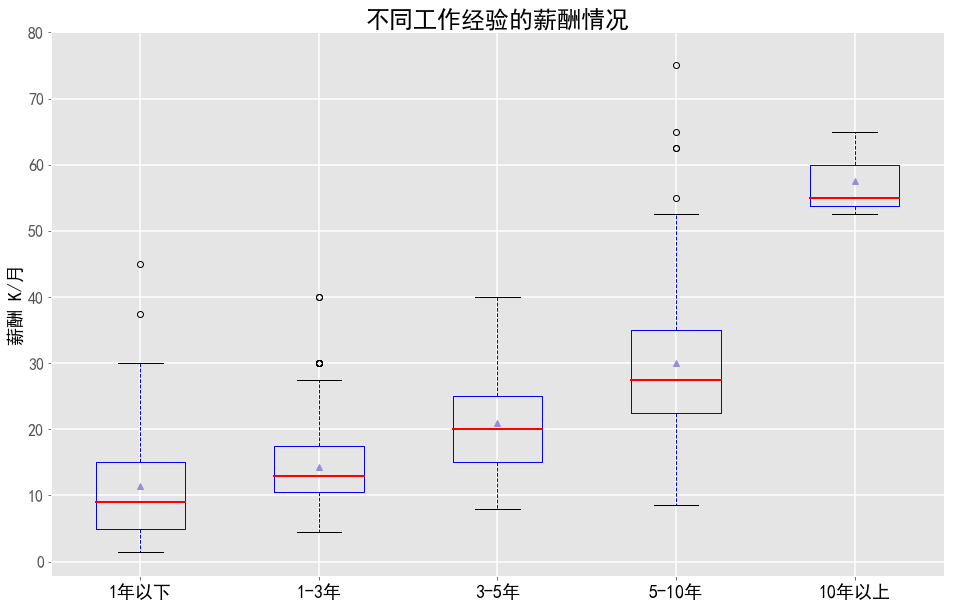

In [31]:
# 绘制不同工作经验的薪酬情况的箱型图
fig = plt.figure(figsize=(16,10))
ax5 = fig.add_subplot(1, 1, 1)
box = ax5.boxplot(sorted_exp_list, 
                  showmeans=True, 
                  boxprops={'color': 'b'}, 
                  medianprops={'color':'red','linewidth':2}, 
                  whiskerprops={'linestyle':'dashed','color':'b'})

ax5.set_title('不同工作经验的薪酬情况',fontsize=24)
ax5.set_ylabel('薪酬 K/月', color='k', fontsize=18)
ax5.set_xticklabels(sort_by_exp.index, fontsize=18, color='k')
ax5.grid(True, color='w', linewidth=1.5)
plt.yticks(range(0, 85, 10), fontsize=16)

从图中可以看出，随着经验的提升，数据分析师的薪酬也在不断提高。另外，从现有数据来看，数据分析师似乎是个常青的职业方向，**在正常情况下，10年内数据分析师们的收入不会由年龄的增长而导致下降**。

同时，从业5年是数据分析师的一个关键时期，在这个时期除了薪酬会因为工作经验的增加而正常增长外，还会有更多的可能去获取远超同仁的薪酬。所以，期望从事数据分析这一职业的小伙伴们要注意了，5年的职业规划很重要！

### 7.6 职业技能的关键词 ###

In [32]:
# 处理职位描述和任职要求这一字段,梳理出职业技能的关键词

# 首先抽取关键词
def key_words(text):
    key_words = jieba.analyse.extract_tags(text, topK=20, withWeight=False, allowPOS=())
    return key_words

words_dict = dict(clean_data['description'].apply(key_words))

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\asus\AppData\Local\Temp\jieba.cache
Loading model cost 1.187 seconds.
Prefix dict has been built succesfully.


In [33]:
# 对准备添加进数据集的数据进行统一的格式化，主要是针对英文字符这一部分
new_dict = {}
for i, j in words_dict.items():
    new_list = []
    for x in j:
        x = str(x.upper())
        new_list.append(x)
    j = new_list
    new_dict[i] = j

In [34]:
df_words = pd.DataFrame(new_dict.items(), columns=['number', 'key_words'])

In [35]:
clean_data['key_words'] = df_words['key_words']

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [36]:
keys_list = []
for words in clean_data['key_words']:
    keys_list = keys_list + words

In [37]:
# 创建一个文本,将关键词全部写入该文本
f = open('word_list_text.txt', 'a')
for key in keys_list:
    f.writelines(key+',')    
f.close()

In [38]:
# 打开文件，并将文件作为字符串返回
text = open('word_list_text.txt').read()

In [39]:
# 关键字的字符串是中英文混合,为了便于后续的分析，将其分为中文关键字和英文关键字两个部分

# 整理出英文关键字的字符串
unen = re.compile('[u0061-u007a,+]', re.I)
en = ''.join(unen.findall(text))
en = en.split(',')

en_list = []
for x in en:
    if len(x) > 1:
        en_list.append(x)

el = open('word_list_en.txt', 'a')
for word in en_list:
    el.writelines(word+',')    
el.close()

text_EN = open('word_list_en.txt').read()

In [40]:
#整理出中文关键字的字符串
uncn = re.compile('[^u0061-u007a，]', re.I)
cn= ''.join(uncn.findall(text))
cn = cn.split(',')

cn_list = []
for y in cn:
    if len(y) > 1:
        cn_list.append(y)
        
cl = open('word_list_cn.txt', 'a')
for word in cn_list:
    cl.writelines(word+',')    
cl.close()

text_CN = open('word_list_cn.txt').read()

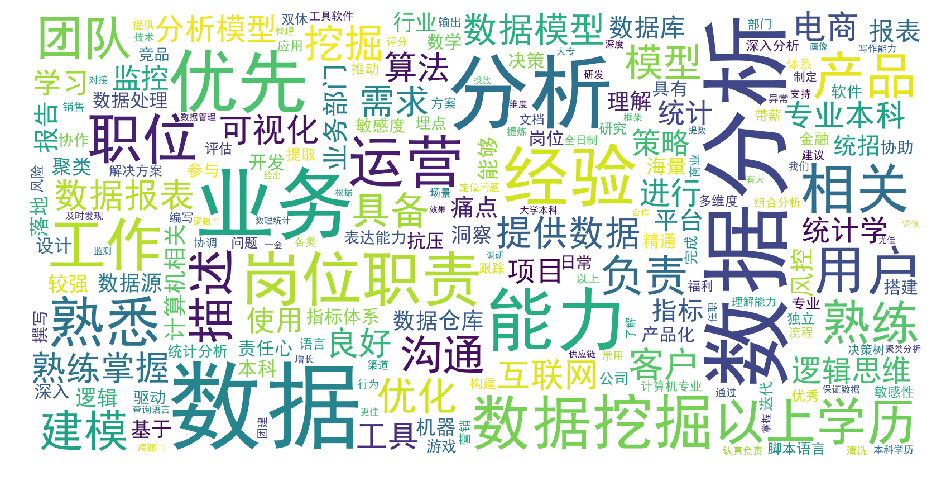

In [41]:
# 绘制中文关键词的词云
font = 'C:/Windows/Fonts/simhei.ttf'
wcd_CN = WordCloud(width=1600, 
                   height=800, 
                   background_color='white', 
                   font_path=font, 
                   collocations = False).generate(text_CN)
# 显示图片
plt.figure(figsize=(16, 10))
plt.imshow(wcd_CN)
plt.axis("off")
plt.show()

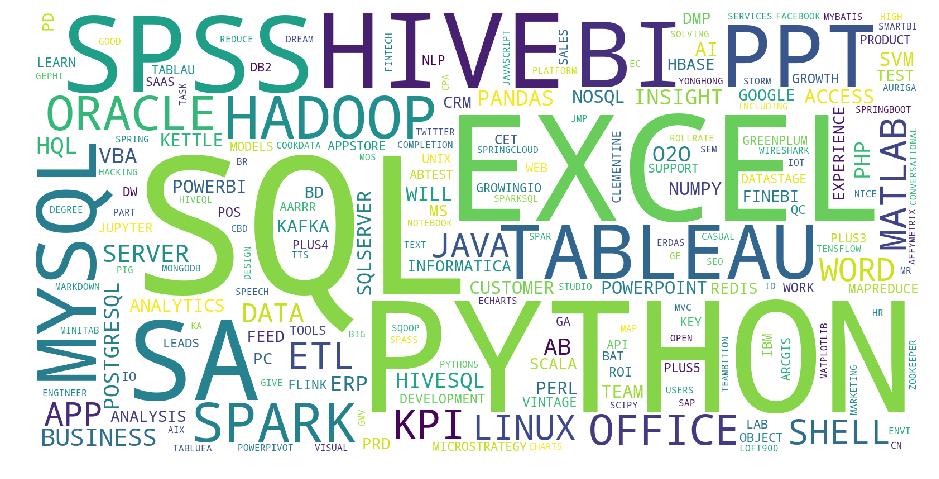

In [42]:
# 绘制英文关键词的词云
wcd_EN = WordCloud(width=1600, 
                   height=800, 
                   background_color='white',
                   collocations = False, 
                   margin=10).generate(text_EN)
# 显示图片
plt.figure(figsize=(16, 10))
plt.imshow(wcd_EN)
plt.axis("off")
plt.show()

In [43]:
# 显示生成的英文词云的词频
wcd_EN.words_

{'SQL': 1.0,
 'PYTHON': 0.6086956521739131,
 'EXCEL': 0.5565217391304348,
 'SA': 0.2811594202898551,
 'SPSS': 0.25507246376811593,
 'HIVE': 0.24347826086956523,
 'BI': 0.1855072463768116,
 'PPT': 0.1681159420289855,
 'MYSQL': 0.1536231884057971,
 'TABLEAU': 0.13623188405797101,
 'HADOOP': 0.11594202898550725,
 'SPARK': 0.11014492753623188,
 'ORACLE': 0.09565217391304348,
 'OFFICE': 0.07246376811594203,
 'KPI': 0.06956521739130435,
 'ETL': 0.057971014492753624,
 'MATLAB': 0.05507246376811594,
 'LINUX': 0.0463768115942029,
 'SHELL': 0.0463768115942029,
 'JAVA': 0.043478260869565216,
 'APP': 0.043478260869565216,
 'WORD': 0.04057971014492753,
 'DATA': 0.02608695652173913,
 'SERVER': 0.02318840579710145,
 'BUSINESS': 0.02318840579710145,
 'HQL': 0.020289855072463767,
 'AB': 0.020289855072463767,
 'PHP': 0.017391304347826087,
 'O2O': 0.017391304347826087,
 'PANDAS': 0.017391304347826087,
 'ERP': 0.017391304347826087,
 'HIVESQL': 0.017391304347826087,
 'INSIGHT': 0.017391304347826087,
 'POST

比较中文词云和英文词云，可以看出中文词云更多的是对于数据分析岗位软实力的描述，而英文词云则是数据分析岗位硬实力的关键所在。

英文词云显示出这样一种情况：对于数据分析师这一岗位，企业需求频率最高的技能是传统的结构化查询语言SQL，Python编程语言和表格神器Excel。这一点需要各位小伙伴注意，**要想从事数据分析师岗位，Python,SQL和Excel看起来是必备技能**。

从词云上看出，数据分析师技能需求频率排在前列的有：**SQL, Python, Excel, SAS(SA), SPSS, Hive, BI, PPT和MySQL等。**

### 7.7 掌握不同技能对薪酬收入的影响 ###

In [44]:
# 通过词云的词频生成职业技能的数据集
index_list = []
for x in wcd_EN.words_.keys():
    if x == 'SA':
        x = 'SAS'
        index_list.append(x)
    else:
        index_list.append(x)

tech_index = pd.Series(index_list)        

tech_df = pd.DataFrame(wcd_EN.words_.values(), index=tech_index, columns=['freq'])

In [45]:
tech_tuple = tuple(tech_df[:20].drop('KPI').index)
tech_tuple

('SQL',
 'PYTHON',
 'EXCEL',
 'SAS',
 'SPSS',
 'HIVE',
 'BI',
 'PPT',
 'MYSQL',
 'TABLEAU',
 'HADOOP',
 'SPARK',
 'ORACLE',
 'OFFICE',
 'ETL',
 'MATLAB',
 'LINUX',
 'SHELL',
 'JAVA')

In [46]:
# 针对词频靠前的技能，统计平均薪酬和需求量

avg_salary_by_tech = {}
count_by_tech = {}

for tech in tech_tuple:
    temp_list = []
    for i in range(len(clean_data['key_words'])):
        if tech in clean_data['key_words'].iloc[i]:
            temp_list.append('1')
        else:
            temp_list.append('0')
    clean_data['count_by'] = pd.DataFrame(temp_list).values
        
    grouped = clean_data.groupby(['count_by'])['avg_month_salary']
    avg_salary_by_tech[tech] = grouped.get_group('1').mean()
    count_by_tech[tech] = grouped.get_group('1').count()

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [47]:
# 对职业技能的平均薪酬和需求量这两个数据集进行联合
df_avg_tech = pd.DataFrame(avg_salary_by_tech.items(), columns=['tech','avg_salary'])
df_count_tech = pd.DataFrame(count_by_tech.items(), columns=['tech','count'])
df_merge_tech = pd.merge(df_avg_tech, df_count_tech, on='tech')

In [48]:
df_merge_tech.head()

,tech,avg_salary,count
0,SQL,18.561584,341
1,PYTHON,19.997608,209
2,EXCEL,16.226316,190
3,SAS,18.807292,96
4,SPSS,18.823864,88


Text(0, 0.5, '薪酬 K/月')

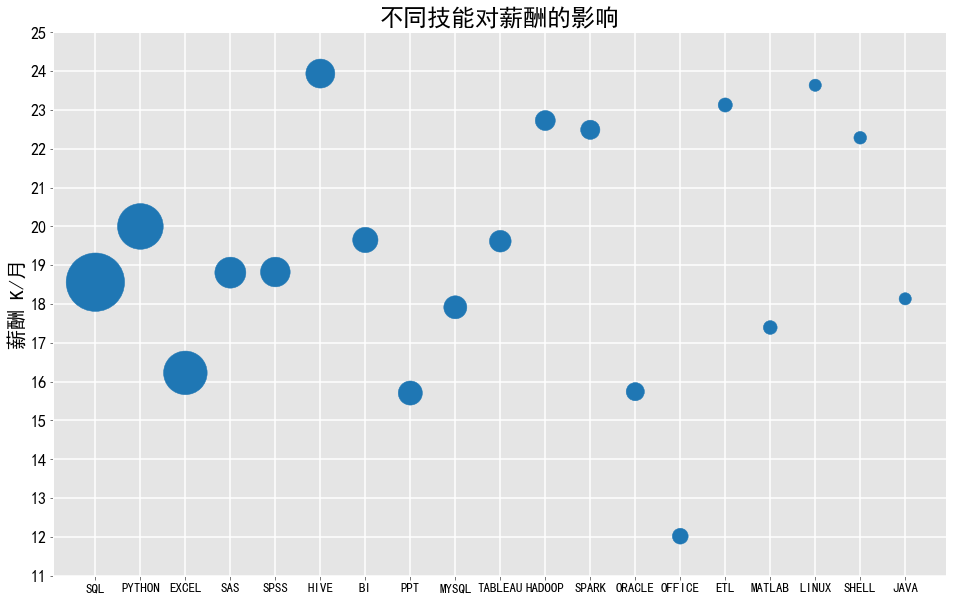

In [49]:
# 绘制不同技能对薪酬影响的散点图
fig = plt.figure(figsize=(16, 10))
ax6 = fig.add_subplot(1, 1, 1)
scatter = ax6.scatter(x = range(len(df_merge_tech)), 
                      y = df_merge_tech['avg_salary'], 
                      s=df_merge_tech['count']*10, 
                      color='tab:blue')
plt.xticks(df_merge_tech.index)
ax6.set_xticklabels(df_merge_tech['tech'], color='k', fontsize=13)
ax6.set_title('不同技能对薪酬的影响', fontsize=24)
ax6.grid(True, color='w', linewidth=1.5)
plt.yticks(range(11, 26, 1), color='k', fontsize=16)
ax6.set_ylabel('薪酬 K/月', color='k', fontsize=20)

这里对需求频率最高的前20个技能（去除'KPI'这一项）进行统计计算，得出每一个技能对应的平均薪酬水平，如上图。点的大小代表该技能需求量的多少。

在前20项技能中, Hive, Linux, ETL, Hadoop, Spark这几个的平均薪酬最高。对数据分析师工作有所了解的人应该都知道，这五个工具中，Hive, Hadoop和Spark都是应用于分布式数据处理，ETL数据仓库则是应用于大数据处理，并且大数据平台的服务器几乎都是搭载Linux系统。这几者共同指向了一个方向，那就是海量数据的处理和分布式数据的处理！

所以，想要拿高薪的小伙伴注意了，**海量数据处理、分布式处理框架**是走向高薪的正确方向。

另外值得注意的是，**在数据分析领域，Python语言的平均薪酬要高于Java语言。同时，Python语言和SQL语言，则能够让你在保证中等收入的条件下，能够适应更多企业的要求，也意味着有更多的工作机会。**

## 八、分析结论 ##

通过上面的分析，我们可以得到的结论有这些：
1. 数据分析这一岗位，有大量的工作机会集中在北上广深以及杭州。
2. 大多数据分析师的收入集中在5k-30k每月，只有少数人能够获得更高的薪酬，但也有人薪酬极高，让人向往。
3. 从待遇上看，数据分析师留在北京、上海发展是个比较好的选择，其次是深圳、杭州和广州。
4. 数据分析是个年轻的职业方向，大量的工作经验需求集中在1-5年。
5. 对于数据分析师来说，5年似乎是个瓶颈期，如果在5年之内没有转型或者质的提升，大概以后的竞争压力会比较大。
6. 随着经验的提升，数据分析师的薪酬也在不断提高，10年以上工作经验的人，能获得相当丰厚的薪酬。
7. 数据分析师的技能需求的频率排在前列的有：SQL, Python, Excel, SAS, SPSS, Hive, BI, PPT和MySQL等，其中SQL和Python简直可以说是必备技能。 
8. 海量数据、分布式处理框架是走向高薪的正确方向，也是从业5年转型或者说质变的关键。
9. SQL语言和Python语言，能够让你在保证中等收入的条件下，适应更多企业的要求，拥有更多的工作机会。

## 九、思考和总结 ##

这次对于数据分析师技能的分析是比较简陋的，在本次分析过程中，仅针对工具型的技能进行了分析。但其实，数据分析师所需要具备的素质远不止这些，还需要有扎实的数学、统计学基础，良好的数据敏感度，开拓但严谨的思维等。如果要对这些内容进行深入挖掘的话，应该会更加有趣。不过，要进行这项内容的话，需要掌握大量中文分词、关键字提取等方面的知识和技能，难度也会更高。

## 特别说明 ##

本次分析所用数据源完全来自拉勾网，但拉钩网本身是专注于互联网相关行业的招聘平台，所以本次分析出的结论更加适用于互联网行业的相关企业，对于其他行业的企业，请酌情参考。